Mean Squared Error: 0.7132757362055184


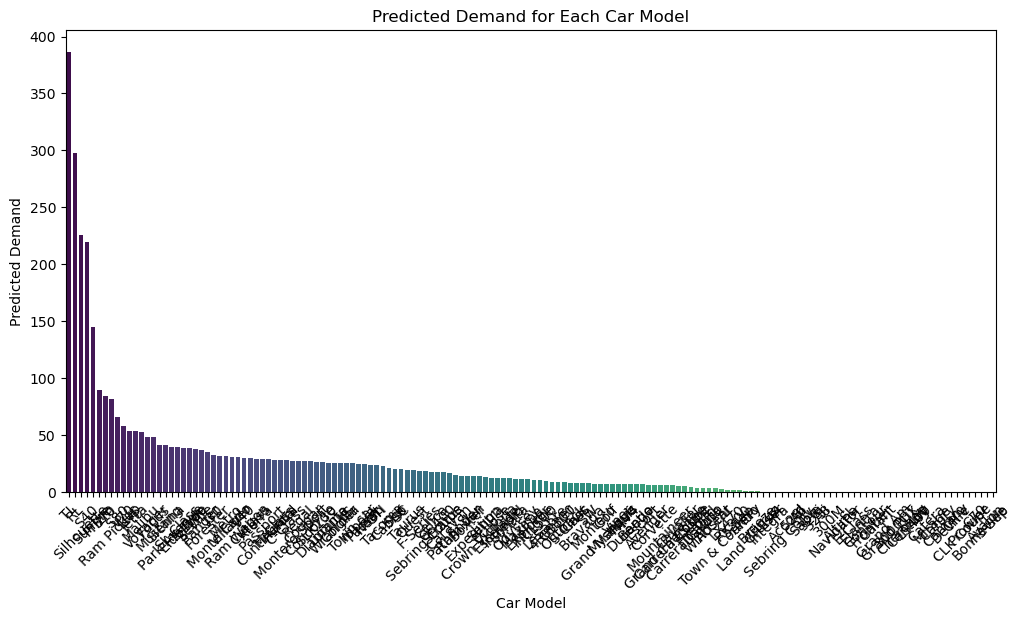

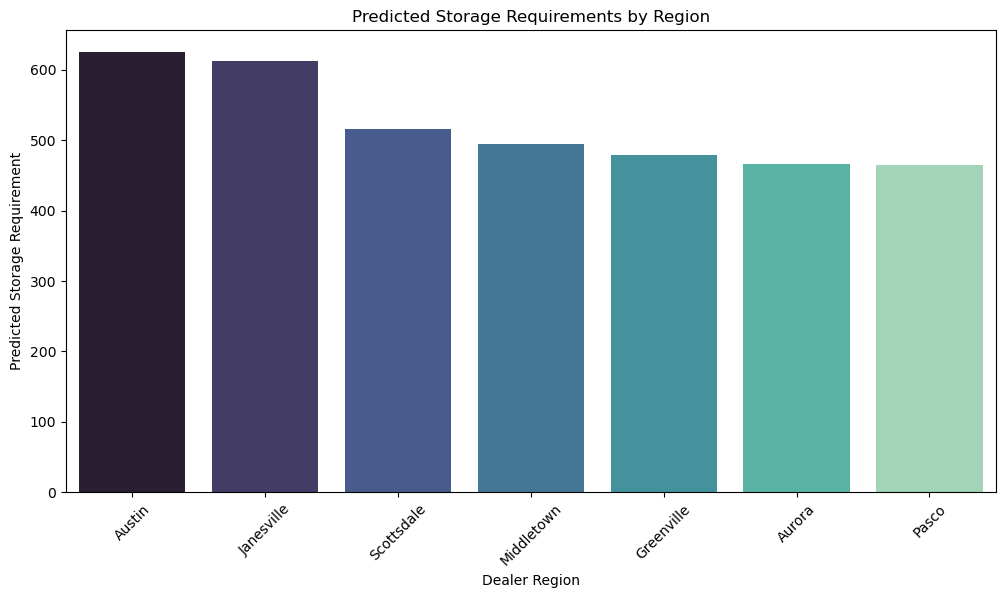

Mean Squared Error: 0.7132757362055184
R-squared Score: 0.2868880170830146


In [9]:
#random forest machine learning to predict which car models will be bought and in which areas will be purchases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('car_data.csv')

# Handle missing values
df.ffill(inplace=True)


#convert annual income in price in order to help prediction
income_bins = [0, 50000, 100000, float('inf')]
income_labels = ['Low Income', 'Medium Income', 'High Income']
df['Income Category'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)
#for car price
price_bins = [0, 26000, 51000, float('inf')]
price_labels = ['Low Priced', 'Medium Priced', 'High Priced']
df['Price Category'] = pd.cut(df['Price ($)'], bins=price_bins, labels=price_labels, right=False)


# Convert categorical data to numeric and store original names
label_encoders = {}
original_names = {}
categorical_columns = ['Gender', 'Dealer_Name', 'Company', 'Model', 
                       'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region','Income Category', 'Price Category']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    original_names[column] = label_encoders[column].inverse_transform(df[column])

# Feature Scaling
scaler = StandardScaler()
df[categorical_columns] = scaler.fit_transform(df[categorical_columns])

# Feature selection
features = ['Gender', 'Dealer_Name', 'Company', 'Engine', 
            'Transmission', 'Color', 'Income Category', 'Dealer_Region', 'Body Style', 'Price Category']
X = df[features]
y = df['Model']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=69)
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Add predicted demand to the dataframe
df['Predicted Demand'] = model.predict(X)

# Use stored original names for visualization
df['Model Name'] = original_names['Model']
df['Region Name'] = original_names['Dealer_Region']

# Add predicted demand to the dataframe
df['Predicted Demand'] = model.predict(X)

# Clip negative predictions to be non-negative
df['Predicted Demand'] = df['Predicted Demand'].clip(lower=0)

# Visualization for Model Demand Prediction
plt.figure(figsize=(12, 6))
model_demand = df.groupby('Model Name')['Predicted Demand'].sum().sort_values(ascending=False)
sns.barplot(x=model_demand.index, y=model_demand.values, palette='viridis')
plt.title('Predicted Demand for Each Car Model')
plt.xlabel('Car Model')
plt.ylabel('Predicted Demand')
plt.xticks(rotation=45)
plt.show()

# Visualization for Regional Storage Requirement
plt.figure(figsize=(12, 6))
regional_storage = df.groupby('Region Name')['Predicted Demand'].sum().sort_values(ascending=False)
sns.barplot(x=regional_storage.index, y=regional_storage.values, palette='mako')
plt.title('Predicted Storage Requirements by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Predicted Storage Requirement')
plt.xticks(rotation=45)
plt.show()
# Predict and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')